<a href="https://colab.research.google.com/github/pierredumontel/Hayashi-Yoshida-estimator/blob/main/Notebook/HY_correlation_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyinterval
from interval import interval

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.stats import norm
from pylab import plot, show, grid, xlabel, ylabel
from scipy.stats import pearsonr
from math import *
from random import *
import seaborn as sns
import scipy.stats as stat

# Question 1 : Generate 2 correlated Brownian motions 
https://scipy-cookbook.readthedocs.io/items/BrownianMotion.html

In [ ]:
def brownian(x0, n, dt, delta, out=None):
   
    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

## 3 months window and daily observations 

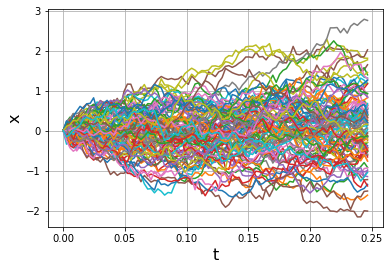

In [ ]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 90/(365)
# Number of steps.
N = 90
# Time step size
dt = T/N
# Number of realizations to generate.
m = 100
# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

y = np.empty((m,N+1))
# Initial values of x.
y[:, 0] = 0

brownian(y[:,0], N, dt, delta, out=y[:,1:])


t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

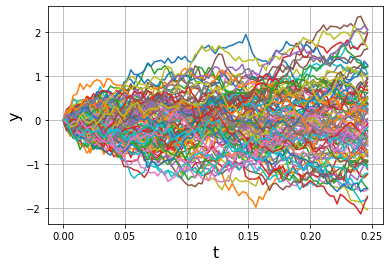

In [ ]:
for j in range(m):
    plot(t, y[j])
xlabel('t', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

### Correlation estimators

In [ ]:
X = pd.DataFrame(x).T
Y = pd.DataFrame(y).T

q1_pear = X.corrwith(Y,method='pearson')
q1_kend = X.corrwith(Y,method='kendall')
q1_abs_pear = X.corrwith(Y,method='pearson').abs()
q1_abs_kend = X.corrwith(Y,method='kendall').abs()

q1_kend3_stats = stat.describe(q1_abs_kend)
q1_pear3_stats = stat.describe(q1_abs_pear)
q1_stats_3m = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 3 months' : q1_kend3_stats,
              'Pearson 3 months' : q1_pear3_stats
})

days = pd.DataFrame({
    "Pearson correlation" : q1_abs_pear, 
    "Kendall correlation" : q1_abs_kend
})

## 1min and a half window and 1s observation

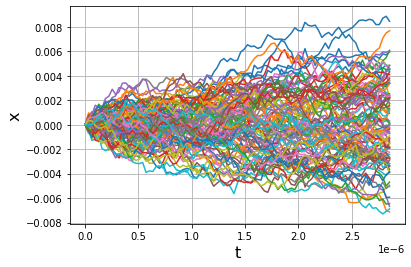

In [ ]:
# The Wiener process parameter.
delta = 2
# Total time.
T = 90/(365*24*60*60)
# Number of steps.
N = 90
# Time step size
dt = T/N
# Number of realizations to generate.
m = 100


# Create an empty array to store the realizations.
x = np.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

# Create an empty array to store the realizations.
y = np.empty((m,N+1))
# Initial values of x.
y[:, 0] = 0

brownian(y[:,0], N, dt, delta, out=y[:,1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

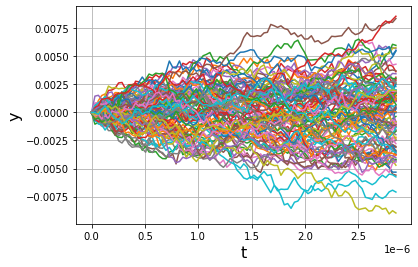

In [ ]:
for k in range(m):
    plot(t, y[k])
xlabel('t', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

### Correlation estimators

In [ ]:
X = pd.DataFrame(x).T
Y = pd.DataFrame(y).T

q1_pear2 = X.corrwith(Y,method='pearson')
q1_kend2 = X.corrwith(Y,method='kendall')
q1_abs_pear2 = X.corrwith(Y,method='pearson').abs()
q1_abs_kend2 = X.corrwith(Y,method='kendall').abs()

q1_kend130_stats = stat.describe(q1_abs_kend2)
q1_pear130_stats = stat.describe(q1_abs_pear2)


q1_stats_1m30 = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 1min 30' : q1_kend130_stats,
              'Pearson 1min 30' : q1_pear130_stats
})

seconds = pd.DataFrame({
    "Pearson correlation" : q1_abs_pear2,
    "Kendall correlation" : q1_abs_kend2
})

## 3 months vs 1min and a half's comparaison 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


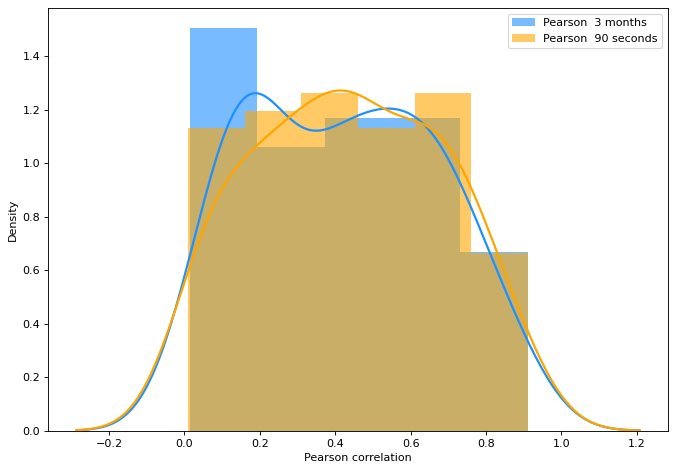

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(days["Pearson correlation"], color="dodgerblue", label="Pearson  3 months", **kwargs)
sns.distplot(seconds["Pearson correlation"], color="orange", label="Pearson  90 seconds", **kwargs)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


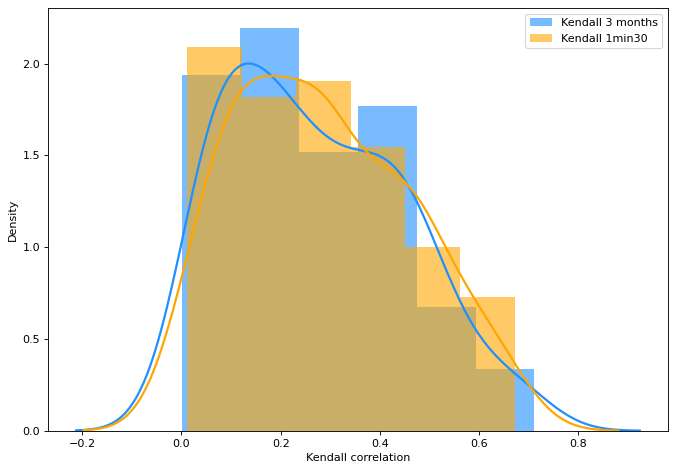

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(days["Kendall correlation"], color="dodgerblue", label="Kendall 3 months", **kwargs)
sns.distplot(seconds["Kendall correlation"], color="orange", label="Kendall 1min30", **kwargs)
plt.legend()

In [ ]:
heatmap1 = pd.DataFrame({
    '3 months pearson' : days["Pearson correlation"],
    '1min30 pearson' : seconds["Pearson correlation"],
    '3 months kendall' : days["Kendall correlation"],
    '1min30 kendall' : seconds["Kendall correlation"]
}).style.background_gradient(cmap='coolwarm')

In [ ]:
pd.merge(q1_stats_3m,q1_stats_1m30, on='Indicateur')

,Indicateur,Kendall 3 months,Pearson 3 months,Kendall 1min 30,Pearson 1min 30
0,n obs,100,100,100,100
1,min/max,"(0.0002442002442002442, 0.7113553113553113)","(0.01352808610631346, 0.9106329212483902)","(0.010989010989010988, 0.6717948717948717)","(0.00897445021633377, 0.9114241380973629)"
2,mean,0.271101,0.419277,0.285665,0.43475
3,variance,0.031659,0.061588,0.030479,0.061563
4,skewness,0.443937,0.122806,0.336991,0.022726
5,kurtosis,-0.717156,-1.116212,-0.857269,-1.043131


# Question 2 : asynchronous times 

## Uniform

In [ ]:
x = np.random.uniform(0, 1, 90) # np.random.uniform(a, b, n) : une array de n valeurs issues d'une loi uniforme entre a et b.
x_cum = np.cumsum(x, axis=0)

y = np.random.uniform(0, 1, 90)
y_cum = np.cumsum(y, axis=0)

# explicit function to normalize array
def normalize(arr, t_min, t_max):
	norm_arr = []
	diff = t_max - t_min
	diff_arr = max(arr) - min(arr)
	for i in arr:
		temp = (((i - min(arr))*diff)/diff_arr) + t_min
		norm_arr.append(temp)
	return norm_arr

## 3 months window and 1 day observation

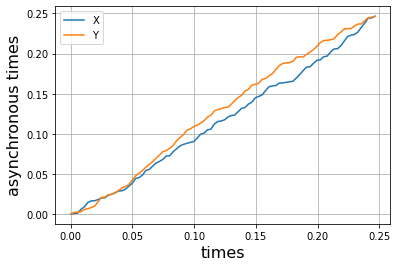

In [ ]:
range_to_normalize = (0, 90/365)
normalized_array_1dX = normalize(
	x_cum, range_to_normalize[0],
range_to_normalize[1])

normalized_array_1dY = normalize(
	y_cum, range_to_normalize[0],
range_to_normalize[1])

prt = 90/(365)
t = np.linspace(0.0, prt, 90)
plt.plot(t,normalized_array_1dX, label='X')
plt.plot(t,normalized_array_1dY, label='Y')
plt.xlabel('times', fontsize=16)
plt.ylabel('asynchronous times', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

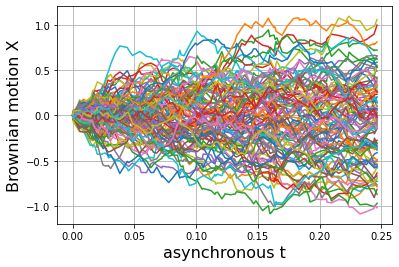

In [ ]:
from matplotlib.patches import draw_bbox
d=100 #number of simulation
Xdt = np.zeros(len(normalized_array_1dX))
Ydt = np.zeros(len(normalized_array_1dY))
n = 90 #nb of time steps
T= 90/(365)  # Time horizon u = day


dBx = np.zeros((len(normalized_array_1dX),d))
for time in range(0,len(normalized_array_1dX)):
  if time == 0:
    Xdt[time] = normalized_array_1dX[time]
    dBx[time] = np.zeros(shape=(d))
  if time !=0:
    Xdt[time] = normalized_array_1dX[time]-normalized_array_1dX[time-1]
    dBx[time] = np.sqrt(Xdt[time])*np.random.normal(size=(1,d))

Bx=np.cumsum(dBx, axis=0)

dBy = np.zeros((len(normalized_array_1dY),d))
for time in range(0,len(normalized_array_1dY)):
  if time == 0:
    Ydt[time] = normalized_array_1dY[time]
    dBy[time] = np.zeros(shape=(d))
  if time !=0:
    Ydt[time] = normalized_array_1dY[time]-normalized_array_1dY[time-1]
    dBy[time] = np.sqrt(Ydt[time])*np.random.normal(size=(1,d))

By=np.cumsum(dBy, axis=0)

plt.plot(normalized_array_1dX, Bx)
plt.xlabel('asynchronous t', fontsize=16)
plt.ylabel('Brownian motion X', fontsize=16)
plt.grid(True)
plt.show()

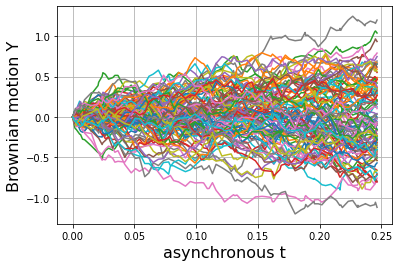

In [ ]:
plt.plot(normalized_array_1dY, By)
plt.xlabel('asynchronous t', fontsize=16)
plt.ylabel('Brownian motion Y', fontsize=16)
plt.grid(True)
plt.show()

### Correlation 

In [ ]:
X = pd.DataFrame(Bx)
Y = pd.DataFrame(By)

q2_pear = X.corrwith(Y,method='pearson')
q2_kend = X.corrwith(Y,method='kendall')
q2_abs_pear = X.corrwith(Y,method='pearson').abs()
q2_abs_kend = X.corrwith(Y,method='kendall').abs()

q2_kend3_stats = stat.describe(q2_abs_kend)
q2_pear3_stats = stat.describe(q2_abs_pear)
q2_stats_3m = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 3 months' : q2_kend3_stats,
              'Pearson 3 months' : q2_pear3_stats
})

q2_days = pd.DataFrame({
    "Pearson correlation" : q2_abs_pear,
    "Kendall correlation" : q2_abs_kend
})

### Hayashi - Yoshida  estimator

In [ ]:
XD = X.diff().dropna()
XD =  XD.reset_index()
XD = XD.drop(columns='index')
YD = Y.diff().dropna()
YD =  YD.reset_index()
YD = YD.drop(columns='index')

times = pd.DataFrame({'time X': np.cumsum(normalized_array_1dX, axis=0),
            'time Y': np.cumsum(normalized_array_1dY, axis=0),
              })
Xinter = {}
Yinter= {}
for i in range (0,len(normalized_array_1dX)-1):
  Xinter[i] = pd.Interval(times['time X'][i],times['time X'][i+1], closed='left')
  Yinter[i] = pd.Interval(times['time Y'][i],times['time Y'][i+1], closed='left')

Overlaps  = {}
for i in range (0,89) :
  for j in range (0,89) : 
    Overlaps[i,j] = Xinter[i].overlaps(Yinter[j])

cov = {}
cov_HYE = {}
for k in range (0,100) :
  for i in range (0,88):
    for j in range (0,88) : 
      if Overlaps[i,j] ==True: 
        cov[k,i,j] = YD[k][j]*XD[k][i]
        cov_HYE[k] = cov[k,i,j].sum()

squared_XD = {}
squared_YD = {}
den_HYE = {}
for k in range (0,100):
      squared_XD[k]= (XD[k]**2).sum()
      squared_YD[k]= (YD[k]**2).sum()
      den_HYE[k] = X[k].std()*Y[k].std()
      #sqrt(squared_XD[k]*squared_YD[k])

corr_HYE = {}
for k in range (0,100):
  corr_HYE[k]=cov_HYE[k]/den_HYE[k]

corr_HYE = pd.Series(corr_HYE).abs() 

days_HYE = pd.DataFrame({
    "HY correlation estimator" : corr_HYE
})

HYE3m_stats = stat.describe(pd.Series(corr_HYE))
q2_stats_3m = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 3 months' : q2_kend3_stats,
              'Pearson 3 months' : q2_pear3_stats,
              'HY estimator 3 months' : HYE3m_stats
})

q2_stats_3m 

# i pour ligne x 
# j pour ligne y 
# k pour colonne Y et X 

,Indicateur,Kendall 3 months,Pearson 3 months,HY estimator 3 months
0,n obs,100,100,100
1,min/max,"(0.004244694132334581, 0.6484394506866417)","(0.0009760712648805864, 0.8725613429331667)","(8.621991775870267e-06, 0.08541570208827003)"
2,mean,0.275376,0.432287,0.011134
3,variance,0.031541,0.065545,0.000241
4,skewness,0.330778,0.072614,2.435533
5,kurtosis,-0.94008,-1.175513,6.725093


## 1min and a half window and 1s observation

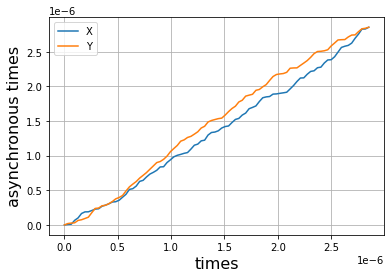

In [ ]:
range_to_normalize = (0, 90/(365*24*60*60))
normalized_array_1sX = normalize(
	x_cum, range_to_normalize[0],
range_to_normalize[1])

normalized_array_1sY = normalize(
	y_cum, range_to_normalize[0],
range_to_normalize[1])

prt = 90/(365*24*60*60)
t = np.linspace(0.0, prt, 90)

plt.plot(t,normalized_array_1sX, label='X')
plt.plot(t,normalized_array_1sY, label='Y')
plt.xlabel('times', fontsize=16)
plt.ylabel('asynchronous times', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

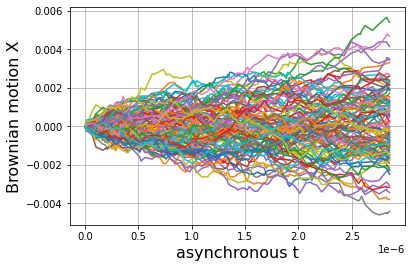

In [ ]:
d=100 #number of simulation
Xdt = np.zeros(len(normalized_array_1sX))
Ydt = np.zeros(len(normalized_array_1sY))
n = 90 #nb of time steps
T= 90/(365*24*60*60)  # Time horizon u = day

dBx = np.zeros((len(normalized_array_1sX),d))
for time in range(0,len(normalized_array_1sX)):
  if time == 0:
    Xdt[time] = normalized_array_1sX[time]
    dBx[time] = np.zeros(shape=(d))
  if time !=0:
    Xdt[time] = normalized_array_1sX[time]-normalized_array_1sX[time-1]
    dBx[time] = np.sqrt(Xdt[time])*np.random.normal(size=(1,d))

Bx=np.cumsum(dBx, axis=0)

dBy = np.zeros((len(normalized_array_1sY),d))
for time in range(0,len(normalized_array_1sY)):
  if time == 0:
    Ydt[time] = normalized_array_1sY[time]
    dBy[time] = np.zeros(shape=(d))
  if time !=0:
    Ydt[time] = normalized_array_1sY[time]-normalized_array_1sY[time-1]
    dBy[time] = np.sqrt(Ydt[time])*np.random.normal(size=(1,d))

By=np.cumsum(dBy, axis=0)

plt.plot(normalized_array_1sX, Bx)
plt.xlabel('asynchronous t', fontsize=16)
plt.ylabel('Brownian motion X', fontsize=16)
plt.grid(True)
plt.show()

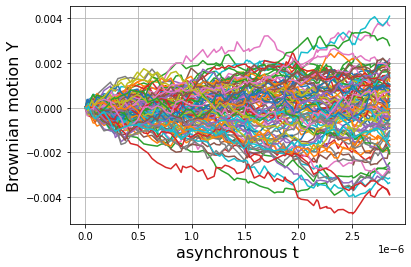

In [ ]:
plt.plot(normalized_array_1sY, By)
plt.xlabel('asynchronous t', fontsize=16)
plt.ylabel('Brownian motion Y', fontsize=16)
plt.grid(True)
plt.show()

### Correlation

In [ ]:
X = pd.DataFrame(Bx)
Y = pd.DataFrame(By)

q2_pear2 = X.corrwith(Y,method='pearson')
q2_kend2 = X.corrwith(Y,method='kendall')
q2_abs_pear2 = X.corrwith(Y,method='pearson').abs()
q2_abs_kend2 = X.corrwith(Y,method='kendall').abs()

q2_kend130_stats2 = stat.describe(q2_abs_kend2)
q2_pear130_stats2 = stat.describe(q2_abs_pear2)

'''
stats_1m30 = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 1min 30' : kend130_stats,
              'Pearson 1min 30' : pear130_stats
})
'''
q2_seconds = pd.DataFrame({
    "Pearson correlation" : q2_abs_pear2,
    "Kendall correlation" : q2_abs_kend2
})

## Hayashi - Yoshida 

In [ ]:
XD = X.diff().dropna()
XD =  XD.reset_index()
XD = XD.drop(columns='index')
YD = Y.diff().dropna()
YD =  YD.reset_index()
YD = YD.drop(columns='index')

times = pd.DataFrame({'time X': np.cumsum(normalized_array_1sX, axis=0),
            'time Y': np.cumsum(normalized_array_1sY, axis=0),
              })
Xinter = {}
Yinter= {}
for i in range (0,len(normalized_array_1sX)-1):
  Xinter[i] = pd.Interval(times['time X'][i],times['time X'][i+1], closed='left')
  Yinter[i] = pd.Interval(times['time Y'][i],times['time Y'][i+1], closed='left')

Overlaps  = {}
for i in range (0,89) :
  for j in range (0,89) : 
    Overlaps[i,j] = Xinter[i].overlaps(Yinter[j])

cov = {}
cov_HYE = {}
for k in range (0,100) :
  for i in range (0,88):
    for j in range (0,88) : 
      if Overlaps[i,j] ==True: 
        cov[k,i,j] = YD[k][j]*XD[k][i]
        cov_HYE[k] = cov[k,i,j].sum()

squared_XD = {}
squared_YD = {}
den_HYE = {}
for k in range (0,100):
      squared_XD[k]= (XD[k]**2).sum()
      squared_YD[k]= (YD[k]**2).sum()
      den_HYE[k] = sqrt(squared_XD[k]*squared_YD[k])

corr_HYE = {}
for k in range (0,100):
  corr_HYE[k]=cov_HYE[k]/den_HYE[k]

corr_HYE = pd.Series(corr_HYE).abs()

seconds_HYE = pd.DataFrame({
    "HY correlation estimator" : corr_HYE
})

HYE90s_stats = stat.describe(pd.Series(corr_HYE))
q2_stats_90s = pd.DataFrame({
              'Indicateur':['n obs','min/max','mean','variance','skewness','kurtosis'],
              'Kendall 90 seconds' : q2_kend130_stats2,
              'Pearson 90 seconds' : q2_pear130_stats2,
              'HY estimator 90 seconds' : HYE90s_stats
})

q2_stats_90s

# i pour ligne x 
# j pour ligne y 
# k pour colonne Y et X 

,Indicateur,Kendall 90 seconds,Pearson 90 seconds,HY estimator 90 seconds
0,n obs,100,100,100
1,min/max,"(0.0067415730337078645, 0.7058676654182272)","(0.005355630496148492, 0.9176300682200159)","(8.277986734202978e-07, 0.011972860582177216)"
2,mean,0.285988,0.435421,0.001931
3,variance,0.035165,0.060184,0.000005
4,skewness,0.531144,0.197029,1.927367
5,kurtosis,-0.621882,-0.93601,4.618917


## 3 months vs 1min and a half's correlation estimators comparaison 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


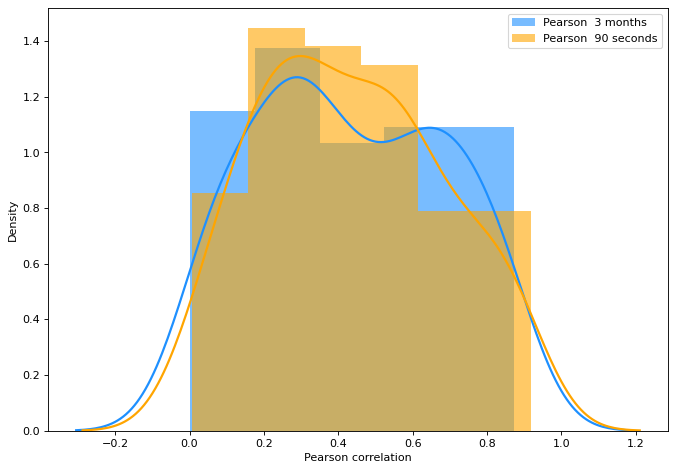

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(q2_days["Pearson correlation"], color="dodgerblue", label="Pearson  3 months", **kwargs)
sns.distplot(q2_seconds["Pearson correlation"], color="orange", label="Pearson  90 seconds", **kwargs)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


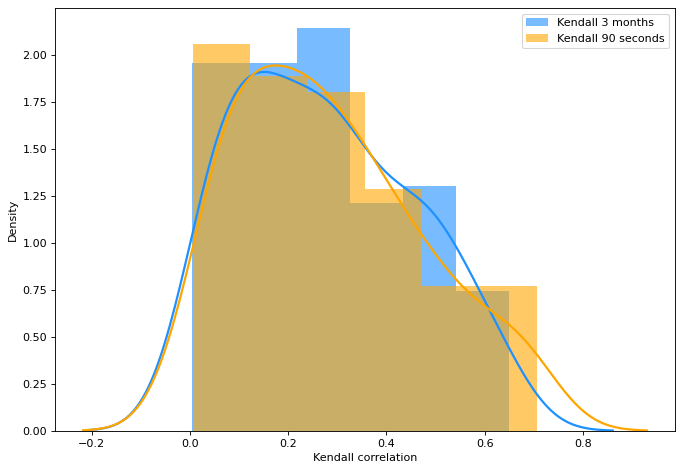

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(q2_days["Kendall correlation"], color="dodgerblue", label="Kendall 3 months", **kwargs)
sns.distplot(q2_seconds["Kendall correlation"], color="orange", label="Kendall 90 seconds", **kwargs)
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


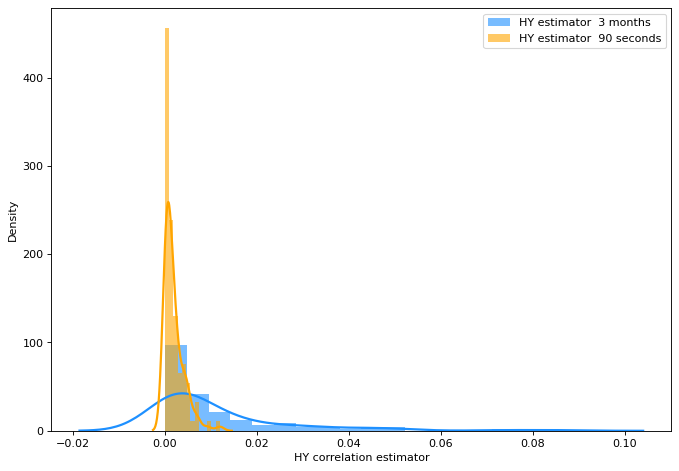

In [ ]:
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(days_HYE["HY correlation estimator"], color="dodgerblue", label="HY estimator  3 months", **kwargs)
sns.distplot(seconds_HYE["HY correlation estimator"], color="orange", label="HY estimator  90 seconds", **kwargs)
plt.legend()

In [ ]:
pd.DataFrame({
    '3 months pearson' : q2_days["Pearson correlation"],
    '1min30 pearson' : q2_seconds["Pearson correlation"],
    '3 months kendall' : q2_days["Kendall correlation"],
    '1min30 kendall' : q2_seconds["Kendall correlation"]
}).style.background_gradient(cmap='coolwarm')

In [ ]:
pd.merge(q2_stats_3m,q2_stats_90s, on='Indicateur')

,Indicateur,Kendall 3 months,Pearson 3 months,HY estimator 3 months,Kendall 90 seconds,Pearson 90 seconds,HY estimator 90 seconds
0,n obs,100,100,100,100,100,100
1,min/max,"(0.004244694132334581, 0.6484394506866417)","(0.0009760712648805864, 0.8725613429331667)","(8.621991775870267e-06, 0.08541570208827003)","(0.0067415730337078645, 0.7058676654182272)","(0.005355630496148492, 0.9176300682200159)","(8.277986734202978e-07, 0.011972860582177216)"
2,mean,0.275376,0.432287,0.011134,0.285988,0.435421,0.001931
3,variance,0.031541,0.065545,0.000241,0.035165,0.060184,0.000005
4,skewness,0.330778,0.072614,2.435533,0.531144,0.197029,1.927367
5,kurtosis,-0.94008,-1.175513,6.725093,-0.621882,-0.93601,4.618917
